<h1 style="margin: auto; font-weight: bold; padding: 30px 30px 0px 30px; color:#000;" align="center">SCHOOL DROPOUT IN SOGAMOSO</h1>
<h3 style="width: 100%; text-align: center; float: left; font-size: 24px; color:#000;" align="center">| EDA Notebook |</h3>
<h5 style="width: 100%; text-align: center; float: left; font-size: 24px; color:#000; margin-top: 0px;" align="center">Correlation One - DS4A</h5>
<p style="text-align:center;">In this notebook will be conducted an EDA in order to understand the data and how those data is related with the Schoold Dropout in Sogamoso, Colombia.</p>

## 1. Libraries

In [1]:
# General
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

## Own specific functions 
from functions import *

## 2. Importing files

In [2]:
df_students_2019 = pd.read_csv("datasets/alumnos_s_oficial2019.csv", encoding="cp1252", sep=";")
df_students_2020 = pd.read_csv("datasets/alumnos_s_oficial2020.csv", encoding="cp1252", sep=";", low_memory=False)
df_students_2021 = pd.read_csv("datasets/alumnos_s_oficial2021.csv", encoding="cp1252", sep=";")
df_students_2022 = pd.read_csv("datasets/alumnos_s_oficial2022.csv", encoding="cp1252", sep=";")
df_schools_MEN = pd.read_csv("datasets/Sogamoso_instituciones_MEN.csv", sep=';')

### 2.1 Initial analysis

Let's make a initial analysis over the datasets

In [3]:
pd.set_option("display.max_columns", None) # To show all column in the dataset

for year in range(2019, 2022+1):
    print("\n>>>>>>>>>> df_students_" + str(year) + " <<<<<<<<<<")
    display(globals()["df_students_" + str(year)].head(3))
    df_analysis(globals()["df_students_" + str(year)],
                key_columns=["NUI"], analysis_type="complete")
    print("\n")
    
pd.reset_option("display.max_columns") # reset max of showing cols


>>>>>>>>>> df_students_2019 <<<<<<<<<<


,ANO,ETC,ESTADO,JERARQUIA,INSTITUCION,DANE,CALENDARIO,SECTOR,SEDE,CODIGO_DANE_SEDE,CONSECUTIVO,ZONA_SEDE,JORNADA,GRADO_COD,GRUPO,MODELO,MOTIVO,FECHAINI,FECHAFIN,NUI,ESTRATO,SISBEN_TRES,GENERO,MATRICULACONTRATADA,FUENTE_RECURSOS,INTERNADO,NUM_CONTRATO,APOYO_ACADEMICO_ESPECIAL,SRPA,DISCAPACIDAD,PAIS_ORIGEN
0,2019,SOGAMOSO,MATRICULADO,NUCLEO 1,INSTITUCION EDUCATIVA COLEGIO DE SUGAMUXI,"1,16E+11",A,OFICIAL,INSTITUCION EDUCATIVA COLEGIO DE SUGAMUXI,"1,16E+11","1,16E+13",URBANA,MA¾ANA,9.0,902,EDUCACI…N TRADICIONAL,NaN,2019-04-23 15:50:51.0,NaN,DANABA1571788930,ESTRATO 1,-1.0,MASCULINO,N,SGP,NINGUNO,NaN,NO APLICA,NO APLICA,NO APLICA,COLOMBIA
1,2019,SOGAMOSO,MATRICULADO,NUCLEO 2,INSTITUCION EDUCATIVA EMPRESARIALY AGROINDUSTR...,"1,16E+11",A,OFICIAL,INSTITUCION EDUCATIVA EMPRESARIALY AGROINDUSTR...,"1,16E+11","1,16E+13",URBANA,‚NICA,6.0,601,EDUCACI…N TRADICIONAL,NaN,2019-02-21 09:34:38.0,NaN,ALEABE1931563776,ESTRATO 2,-1.0,MASCULINO,N,SGP,NINGUNO,NaN,NaN,NaN,NO APLICA,NaN
2,2019,SOGAMOSO,MATRICULADO,NUCLEO 2,INSTITUCION EDUCATIVA EMPRESARIALY AGROINDUSTR...,"1,16E+11",A,OFICIAL,INSTITUCION EDUCATIVA EMPRESARIALY AGROINDUSTR...,"1,16E+11","1,16E+13",URBANA,‚NICA,6.0,601,EDUCACI…N TRADICIONAL,NaN,2019-04-01 09:26:21.0,NaN,YULABE571948373,ESTRATO 3,-1.0,MASCULINO,N,SGP,NINGUNO,NaN,NaN,NaN,NO APLICA,NaN



Analysis header
--------------------------------------------------------------------------------
- Dataset shape:			 21710 rows and 31 columns
- Total of NaN values:			 98130
- Percentage of NaN:			 14.58 %
- Total of infinite values:		 0
- Total of empty columns:		 1
- Total of empty rows:			 0
- Total of full duplicates rows:	 0
- Unique indexes:			 True
- Memory usage:				 5.1+ MB

- The key(s):	 ['NUI'] is not present multiple times in the dataframe. 
		 It CAN be used as a primary key.


Detailed analysis
--------------------------------------------------------------------------------


,name,type,records,unique,# NaN,% NaN,mean,min,25%,50%,75%,max,std
0,ANO,int64,21710,1,0,0.00000,2019.00000,2019.00000,2019.00000,2019.00000,2019.00000,2019.00000,0.00000
2,ESTADO,object,21710,10,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,JERARQUIA,object,21710,3,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,SECTOR,object,21710,1,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,GENERO,object,21710,2,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,NUI,object,21710,21710,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,FECHAINI,object,21710,16656,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ETC,object,21710,1,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,ESTRATO,object,21708,8,2,0.01000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,DISCAPACIDAD,object,21705,15,5,0.02000,NaN,NaN,NaN,NaN,NaN,NaN,NaN





>>>>>>>>>> df_students_2020 <<<<<<<<<<


,ANO,ETC,ESTADO,JERARQUIA,INSTITUCION,DANE,CALENDARIO,SECTOR,SEDE,CODIGO_DANE_SEDE,...,GENERO,TIPO DE SANGRE,MATRICULACONTRATADA,FUENTE_RECURSOS,INTERNADO,NUM_CONTRATO,APOYO_ACADEMICO_ESPECIAL,SRPA,DISCAPACIDAD,PAIS_ORIGEN
0,2020,SOGAMOSO,MATRICULADO,NUCLEO 2,INSTITUCION EDUCATIVA EMPRESARIALY AGROINDUSTR...,"1,16E+11",A,OFICIAL,INSTITUCION EDUCATIVA EMPRESARIALY AGROINDUSTR...,"1,16E+11",...,MASCULINO,O +,N,SGP,NINGUNO,NaN,NaN,NaN,NO APLICA,NaN
1,2020,SOGAMOSO,MATRICULADO,NUCLEO 2,INSTITUCION EDUCATIVA EMPRESARIALY AGROINDUSTR...,"1,16E+11",A,OFICIAL,INSTITUCION EDUCATIVA EMPRESARIALY AGROINDUSTR...,"1,16E+11",...,MASCULINO,O +,N,SGP,NINGUNO,NaN,NaN,NaN,NO APLICA,NaN
2,2020,SOGAMOSO,MATRICULADO,NUCLEO 1,INSTITUCION EDUCATIVA COLEGIO DE SUGAMUXI,"1,16E+11",A,OFICIAL,INSTITUCION EDUCATIVA COLEGIO DE SUGAMUXI,"1,16E+11",...,FEMENINO,O +,N,SGP,NINGUNO,NaN,NO APLICA,NO APLICA,NO APLICA,COLOMBIA



Analysis header
--------------------------------------------------------------------------------
- Dataset shape:			 19994 rows and 32 columns
- Total of NaN values:			 80991
- Percentage of NaN:			 12.66 %
- Total of infinite values:		 0
- Total of empty columns:		 1
- Total of empty rows:			 0
- Total of full duplicates rows:	 0
- Unique indexes:			 True
- Memory usage:				 4.9+ MB

- The key(s):	 ['NUI'] is not present multiple times in the dataframe. 
		 It CAN be used as a primary key.


Detailed analysis
--------------------------------------------------------------------------------


,name,type,records,unique,# NaN,% NaN,mean,min,25%,50%,75%,max,std
0,ANO,int64,19994,1,0,0.00000,2020.00000,2020.00000,2020.00000,2020.00000,2020.00000,2020.00000,0.00000
2,ESTADO,object,19994,6,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,JERARQUIA,object,19994,3,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,FUENTE_RECURSOS,object,19994,6,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,MATRICULACONTRATADA,object,19994,6,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,GENERO,object,19994,2,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,SECTOR,object,19994,1,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,ESTRATO,object,19994,8,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,NUI,object,19994,19994,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,DISCAPACIDAD,object,19994,13,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN





>>>>>>>>>> df_students_2021 <<<<<<<<<<


,ANO,ETC,ESTADO,JERARQUIA,INSTITUCION,DANE,CALENDARIO,SECTOR,SEDE,ZONA_SEDE,...,FECHAFIN,NUI,ESTRATO,SISBEN_TRES,PER_ID,GENERO,SRPA,DISCAPACIDAD,PAIS_ORIGEN,Unnamed: 25
0,2021,SOGAMOSO,MATRICULADO,NUCLEO 2,INSTITUCION EDUCATIVA EMPRESARIAL Y AGROINDUST...,"1,16E+11",A,OFICIAL,INSTITUCION EDUCATIVA EMPRESARIALY AGROINDUSTR...,URBANA,...,NaN,ALEABE1931563776,ESTRATO 2,-1.0,70243135,MASCULINO,NaN,NO APLICA,NaN,NaN
1,2021,SOGAMOSO,MATRICULADO,NUCLEO 2,INSTITUCION EDUCATIVA EMPRESARIAL Y AGROINDUST...,"1,16E+11",A,OFICIAL,INSTITUCION EDUCATIVA EMPRESARIALY AGROINDUSTR...,URBANA,...,NaN,YULABE571948373,ESTRATO 3,-1.0,60907914,MASCULINO,NaN,NO APLICA,NaN,NaN
2,2021,SOGAMOSO,MATRICULADO,NUCLEO 2,INSTITUCION EDUCATIVA POLITECNICO ALVARO GONZA...,"1,16E+11",A,OFICIAL,CONCENTRACION ELROSARIO,URBANA,...,NaN,YOAABE1310307342,ESTRATO 2,-1.0,81073630,MASCULINO,NO APLICA,NO APLICA,COLOMBIA,NaN



Analysis header
--------------------------------------------------------------------------------
- Dataset shape:			 21562 rows and 26 columns
- Total of NaN values:			 70984
- Percentage of NaN:			 12.66 %
- Total of infinite values:		 0
- Total of empty columns:		 1
- Total of empty rows:			 0
- Total of full duplicates rows:	 0
- Unique indexes:			 True
- Memory usage:				 4.3+ MB

- The key(s):	 ['NUI'] is not present multiple times in the dataframe. 
		 It CAN be used as a primary key.


Detailed analysis
--------------------------------------------------------------------------------


,name,type,records,unique,# NaN,% NaN,mean,min,25%,50%,75%,max,std
0,ANO,int64,21562,1,0,0.00000,2021.00000,2021.00000,2021.00000,2021.00000,2021.00000,2021.00000,0.00000
1,ETC,object,21562,1,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ESTADO,object,21562,9,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,JERARQUIA,object,21562,3,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,DISCAPACIDAD,object,21562,16,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,GENERO,object,21562,2,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,PER_ID,int64,21562,21562,0,0.00000,66557297.13167,927709.00000,61149809.00000,68949210.00000,75116811.00000,82761284.00000,11735456.93904
7,SECTOR,object,21562,1,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NUI,object,21562,21562,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,FECHAINI,object,21562,7976,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN





>>>>>>>>>> df_students_2022 <<<<<<<<<<


,ANO,ETC,ESTADO,JERARQUIA,INSTITUCION,DANE,CALENDARIO,SECTOR,SEDE,CODIGO_DANE_SEDE,...,TIPO DE SANGRE,MATRICULACONTRATADA,FUENTE_RECURSOS,INTERNADO,NUM_CONTRATO,APOYO_ACADEMICO_ESPECIAL,SRPA,DISCAPACIDAD,PAIS_ORIGEN,Unnamed: 33
0,2022,SOGAMOSO,MATRICULADO,NUCLEO 1,INSTITUCION EDUCATIVA TECNICA INDUSTRIAL GUSTA...,"2,16E+11",A,OFICIAL,RAMADA,"2,16E+11",...,NaN,N,SGP,NINGUNO,NaN,NO APLICA,NO APLICA,NO APLICA,VENEZUELA,NaN
1,2022,SOGAMOSO,MATRICULADO,NUCLEO 2,INSTITUCION EDUCATIVA MAGDALENA,"1,16E+11",A,OFICIAL,INSTITUCION EDUCATIVA MAGDALENA,"1,16E+11",...,NaN,N,SGP,NaN,NaN,NO APLICA,NO APLICA,NO APLICA,COLOMBIA,NaN
2,2022,SOGAMOSO,MATRICULADO,NUCLEO 2,INSTITUCION EDUCATIVA EMPRESARIAL Y AGROINDUST...,"1,16E+11",A,OFICIAL,INSTITUCION EDUCATIVA EMPRESARIALY AGROINDUSTR...,"1,16E+11",...,O +,N,SGP,NINGUNO,NaN,NaN,NaN,NO APLICA,NaN,NaN



Analysis header
--------------------------------------------------------------------------------
- Dataset shape:			 21111 rows and 34 columns
- Total of NaN values:			 117357
- Percentage of NaN:			 16.35 %
- Total of infinite values:		 0
- Total of empty columns:		 1
- Total of empty rows:			 0
- Total of full duplicates rows:	 0
- Unique indexes:			 True
- Memory usage:				 5.5+ MB

- The key(s):	 ['NUI'] is not present multiple times in the dataframe. 
		 It CAN be used as a primary key.


Detailed analysis
--------------------------------------------------------------------------------


,name,type,records,unique,# NaN,% NaN,mean,min,25%,50%,75%,max,std
0,ANO,int64,21111,1,0,0.00000,2022.00000,2022.00000,2022.00000,2022.00000,2022.00000,2022.00000,0.00000
7,SECTOR,object,21111,1,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,DISCAPACIDAD,object,21111,15,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,GENERO,object,21111,2,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,PER_ID,int64,21111,21111,0,0.00000,69293050.55767,927709.00000,64055607.50000,70688322.00000,76899696.50000,84104295.00000,10634922.36430
19,NUI,object,21111,21111,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ETC,object,21111,1,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,FECHAINI,object,21111,7746,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ESTADO,object,21111,8,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,JERARQUIA,object,21111,3,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-block alert-info">
    <p><b>Observations</b></p>
    <p>Below, some points observed:</p>
    <p>
        <ul style="list-style-type: square;">
            <li>It appears, the number of children differs in each list. It is necessary to validate how much students are into each dataset.</li>
            <li>There are some variables that do not match between datasetsets</li>
            <li>There is a primary key into all dataset ['NUI']  that is not present multiple times in each dataframe</li>
            <li>There are some columns (ETC, SECTOR, CALENDARIO) that only have one value so, we are going to delete them</li>
            <li>Most of the column in each dataset are object type</li>
        </ul>
    </p>
    <p>Now, a little detail for each of the datasets</p>
    <p>
        <ul style="list-style-type: square;">
            <li><b>df_alumnos_2019</b></li>
            <ul style="list-style-type: disc;">
               <li>Dataset shape: 21710 rows and 31 columns</li>
               <li>Missing values: 98130 / 14.58%</li>
               <li>Key(s) column(s): Nui can be used as a primary key</li>
            </ul>
        </ul>
        <ul style="list-style-type: square;">
            <li><b>df_alumnos_2020</b></li>
            <ul style="list-style-type: disc;">
               <li>Dataset shape: 19994 rows and 32 columns</li>
               <li>Missing values: 80991 / 12.66 %</li>
               <li>Key(s) column(s): Nui can be used as a primary key</li>
            </ul>
        </ul>
        <ul style="list-style-type: square;">
            <li><b>df_alumnos_2021</b></li>
            <ul style="list-style-type: disc;">
               <li>Dataset shape: 21562 rows and 26 columns</li>
               <li>Missing values: 70984 / 12.66 %</li>
               <li>Key(s) column(s): Nui can be used as a primary key</li>
            </ul>
        </ul>
        <ul style="list-style-type: square;">
            <li><b>df_alumnos_2021</b></li>
            <ul style="list-style-type: disc;">
               <li>Dataset shape: 21111 rows and 34 columns</li>
               <li>Missing values: 117357 / 16.35 %</li>
               <li>Key(s) column(s): Nui can be used as a primary key</li>
            </ul>
        </ul>
    </p>
</div>

Next, the variables that do not match between datasetsets

![Variables that do not match between datasets](images/variables_that_do_not_match.png)

## 3. Cleaning

### 3.1 Students datasets

#### 3.1.1 Initial cleaning

Deleting columns and rows with 100% of missing-values. At the same time, let's delete the duplicated rows

In [4]:
for year in range(2019, 2022+1):
    globals()["df_students_" + str(year)] = globals()["df_students_" + str(year)].\
                                                dropna(axis="columns", how="all").dropna(axis="rows", how="all")

#### 3.1.2 Removing unnecessary columns

Now, let's remove some unnecessary columns identified by Sogamoso's Municipality and also, thanks to initial analysis. 

In [5]:
COLUMNS_TO_DELETE_THAT_DO_NOT_MATCH = [
    "DANE", "CODIGO_DANE_SEDE", "CONSECUTIVO", "SISBEN IV", "SISBEN_TRES",
    "PER_ID", "TIPO DE SANGRE", "MATRICULACONTRATADA", "FUENTE_RECURSOS",
    "INTERNADO", "NUM_CONTRATO", "APOYO_ACADEMICO_ESPECIAL"
]

OTHER_COLUMNS_TO_DELETE = [
    "JERARQUIA", "ETC", "SECTOR", "CALENDARIO", "Unnamed: 33", "Unnamed: 25"
]

COLUMNS_TO_DELETE = COLUMNS_TO_DELETE_THAT_DO_NOT_MATCH + OTHER_COLUMNS_TO_DELETE

for col in COLUMNS_TO_DELETE:
    for year in range(2019, 2022+1):
        if col in globals()["df_students_" + str(year)]:
            del globals()["df_students_" + str(year)][col]

#### 3.1.3 Checking columns names

In [6]:
for year in range(2019, 2022+1): 
    print("df_students_" + str(year))
    print(list(globals()["df_students_" + str(year)].columns),"\n")

df_students_2019
['ANO', 'ESTADO', 'INSTITUCION', 'SEDE', 'ZONA_SEDE', 'JORNADA', 'GRADO_COD', 'GRUPO', 'MODELO', 'MOTIVO', 'FECHAINI', 'NUI', 'ESTRATO', 'GENERO', 'SRPA', 'DISCAPACIDAD', 'PAIS_ORIGEN'] 

df_students_2020
['ANO', 'ESTADO', 'INSTITUCION', 'SEDE', 'ZONA_SEDE', 'JORNADA', 'GRADO_COD', 'GRUPO', 'MODELO', 'MOTIVO', 'FECHAINI', 'NUI', 'ESTRATO', 'GENERO', 'SRPA', 'DISCAPACIDAD', 'PAIS_ORIGEN'] 

df_students_2021
['ANO', 'ESTADO', 'INSTITUCION', 'SEDE', 'ZONA_SEDE', 'JORNADA', 'GRADO_COD', 'GRUPO', 'MODELO', 'MOTIVO', 'FECHAINI', 'NUI', 'ESTRATO', 'GENERO', 'SRPA', 'DISCAPACIDAD', 'PAIS_ORIGEN'] 

df_students_2022
['ANO', 'ESTADO', 'INSTITUCION', 'SEDE', 'ZONA_SEDE', 'JORNADA', 'GRADO_COD', 'GRUPO', 'MODELO', 'MOTIVO', 'FECHAINI', 'NUI', 'ESTRATO', 'GENERO', 'SRPA', 'DISCAPACIDAD', 'PAIS_ORIGEN'] 



<div class="alert alert-block alert-info">
    <p><b>Observations</b></p>
    <p>The columns name are equals into all datasets</p>
</div>

#### 3.1.3 Completing data between data sets

Now, we are going to complete missing-values between the datasets using the variable `NUI` to see if a student have some missing-value that could be fill with data from other dataset.

In [7]:
for year in range(2019, 2022+1):
    percentage_of_NaN = percentage_missing_values(globals()["df_students_" + str(year)])
    print("df_students_" + str(year) + " NaN = " + str(percentage_of_NaN) + " %")

df_students_2019 NaN = 11.93 %
df_students_2020 NaN = 8.84 %
df_students_2021 NaN = 7.42 %
df_students_2022 NaN = 7.13 %


In [8]:
# Completing data 
LIST_OF_DATASETS = []
for year in range(2019, 2022+1):
    LIST_OF_DATASETS.append("df_students_" + str(year))
    
for a, b in itertools.combinations(LIST_OF_DATASETS, 2):
    globals()[a] = globals()[a].set_index("NUI").fillna(globals()[b].set_index("NUI")).reset_index()

In [9]:
for year in range(2019, 2022+1):
    percentage_of_NaN = percentage_missing_values(globals()["df_students_" + str(year)])
    print("df_students_" + str(year) + " NaN = " + str(percentage_of_NaN) + " %")

df_students_2019 NaN = 8.27 %
df_students_2020 NaN = 7.27 %
df_students_2021 NaN = 7.14 %
df_students_2022 NaN = 7.13 %


<div class="alert alert-block alert-success">
    <p>We can fill some missing-values into the datasets</p>
</div>

#### 3.1.4 Concatenating files

In [10]:
df_students = pd.DataFrame()

for year in range(2019, 2022+1):
    df_students = pd.concat([df_students, globals()["df_students_" + str(year)]])

In [11]:
df_analysis(df_students, key_columns=["NUI"], analysis_type="complete")


Analysis header
--------------------------------------------------------------------------------
- Dataset shape:			 84377 rows and 17 columns
- Total of NaN values:			 107026
- Percentage of NaN:			 7.46 %
- Total of infinite values:		 0
- Total of empty columns:		 0
- Total of empty rows:			 0
- Total of full duplicates rows:	 0
- Unique indexes:			 False
- Memory usage:				 11.6+ MB

- The key(s):	 ['NUI'] is present multiple times in the dataframe. 
		 It CANNOT be used as a primary key.


Detailed analysis
--------------------------------------------------------------------------------


,name,type,records,unique,# NaN,% NaN,mean,min,25%,50%,75%,max,std
0,NUI,object,84377,32043,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,GENERO,object,84377,2,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ESTADO,object,84377,10,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ANO,int64,84377,4,0,0.00000,2020.49864,2019.00000,2019.00000,2021.00000,2022.00000,2022.00000,1.12472
15,DISCAPACIDAD,object,84377,27,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,FECHAINI,object,84377,46647,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,GRADO_COD,float64,84365,20,12,0.01000,7.03767,-2.00000,3.00000,6.00000,9.00000,26.00000,5.88309
12,ESTRATO,object,84363,8,14,0.02000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,INSTITUCION,object,84350,23,27,0.03000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SEDE,object,84350,69,27,0.03000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-block alert-info">
    <p>Let's delete column over 80% of missing-values</p>
</div>

In [12]:
df_students = df_students.loc[:, df_students.isnull().mean() < .8]

In [13]:
df_analysis(df_students, key_columns=["NUI"], analysis_type="header")


Analysis header
--------------------------------------------------------------------------------
- Dataset shape:			 84377 rows and 16 columns
- Total of NaN values:			 28845
- Percentage of NaN:			 2.14 %
- Total of infinite values:		 0
- Total of empty columns:		 0
- Total of empty rows:			 0
- Total of full duplicates rows:	 0
- Unique indexes:			 False
- Memory usage:				 13.0+ MB

- The key(s):	 ['NUI'] is present multiple times in the dataframe. 
		 It CANNOT be used as a primary key.


<div class="alert alert-block alert-success">
    <p>No, we only have 2% of missing-values</p>
</div>

#### 3.1.5 Formatting category columns

Some columns seem not to have a right format.

In [14]:
COLUMNS_TO_VERIFY = [
    "GRADO_COD", "ESTRATO", "JORNADA", "GRUPO"
]

for col in COLUMNS_TO_VERIFY:
    print(">>>> " + col + " <<<<")
    display(df_students[col].unique())
    print("\n")

>>>> GRADO_COD <<<<


array([ 9.,  6., 10., 23., 22.,  3.,  2.,  8.,  7., 24., 11.,  1.,  4.,
        0.,  5., 26., 25., nan, -2., 21., -1.])



>>>> ESTRATO <<<<


array(['ESTRATO 1', 'ESTRATO 2', 'ESTRATO 3', 'ESTRATO 0', 'ESTRATO 6',
       'NO APLICA', 'ESTRATO 5', 'ESTRATO 4', nan], dtype=object)



>>>> JORNADA <<<<


array(['MA¾ANA', '‚NICA', 'FIN DE SEMANA', 'NOCTURNA', 'TARDE', nan,
       'MA¥ANA', 'éNICA'], dtype=object)



>>>> GRUPO <<<<


array(['902', '601', '1004', '602', '901', 'F3', '204', '1002', '301',
       '605', '209', '803', '1001', '704', '905', 'GU', '801', '1', '802',
       '201', '1101', '101', '604', '401', '701', '903', '703', '702',
       '303', '501', '202', '705', '205', '1006', '1103', '203', '603',
       '804', '707', '103', '708', '1005', '402', '403', '607', '2401',
       '1104', '1102', '1106', '405', '1108', 'N4', '2301', '5', '706',
       '502', '306', '2402', 'N6', '408', '8', '409', '805', '2602',
       '1105', '904', '1003', '907', '2601', 'IT23', 'C2', '507', '906',
       'C06', '307', 'B4', '2', 'SF6', '102', '6', '104', '809', '4',
       '206', '606', '709', 'E3', '806', 'C3', '1007', '807', '305',
       'BAP4', '304', 'E5', '509', 'III', 'C04', '909', '503', '302',
       '1008', '609', '1009', '406', '208', '2302', '407', '404', '3',
       'IT24', '608', '7', '108', 'VI', 'C05', '1107', '105', 'F4',
       '2501', 'BIT5', '810', '106', 'BAP5', '506', '508', '908', '504',
    

<div class="alert alert-block alert-info">
    <p><b>Observations</b></p>
    <p>It seems that all column are the right format but, <b>GRUPO</b> seems to add no value so, let's proceed to delete it
</div>

In [15]:
del df_students["GRUPO"]

In [16]:
df_analysis(df_students, analysis_type="complete")


Analysis header
--------------------------------------------------------------------------------
- Dataset shape:			 84377 rows and 15 columns
- Total of NaN values:			 28770
- Percentage of NaN:			 2.27 %
- Total of infinite values:		 0
- Total of empty columns:		 0
- Total of empty rows:			 0
- Total of full duplicates rows:	 0
- Unique indexes:			 False
- Memory usage:				 12.3+ MB


Detailed analysis
--------------------------------------------------------------------------------


,name,type,records,unique,# NaN,% NaN,mean,min,25%,50%,75%,max,std
0,NUI,object,84377,32043,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ANO,int64,84377,4,0,0.00000,2020.49864,2019.00000,2019.00000,2021.00000,2022.00000,2022.00000,1.12472
2,ESTADO,object,84377,10,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,FECHAINI,object,84377,46647,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,GENERO,object,84377,2,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,DISCAPACIDAD,object,84377,27,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,GRADO_COD,float64,84365,20,12,0.01000,7.03767,-2.00000,3.00000,6.00000,9.00000,26.00000,5.88309
10,ESTRATO,object,84363,8,14,0.02000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,INSTITUCION,object,84350,23,27,0.03000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SEDE,object,84350,69,27,0.03000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 3.1.6 Checking category columns

In [17]:
CATEGORY_COLUMNS = [
    "INSTITUCION", "SEDE", "DISCAPACIDAD", "GRADO_COD", "ESTRATO", "ZONA_SEDE",
    "JORNADA", "MODELO", "SRPA", "PAIS_ORIGEN", 
]

for col in CATEGORY_COLUMNS:
    print(">>>> " + col + " <<<<")
    try:
        display(sorted(df_students[col].unique()))
        print("\n")
    except:
        display(df_students[col].unique())
        print("\n")

>>>> INSTITUCION <<<<


array(['INSTITUCION EDUCATIVA COLEGIO DE SUGAMUXI',
       'INSTITUCION EDUCATIVA EMPRESARIALY AGROINDUSTRIAL LOS ANDES INSEANDES',
       'INSTITUCION EDUCATIVA POLITECNICO ALVARO GONZALEZ SANTANA',
       'INSTITUCION EDUCATIVA SAN MARTùN DE TOURS',
       'INSTITUCION EDUCATIVA LOS LIBERTADORES',
       'INSTITUCION EDUCATIVA TECNICO DE BELLAS ARTES',
       'INSTITUCION EDUCATIVA TECNICO INDUSTRIAL GUSTAVO JIMENEZ',
       'INSTITUCION EDUCATIVA INTEGRADO JOAQUIN GONZALEZ CAMARGO',
       'INSTIUCION EDUCATIVA NUESTRA SE¾ORA DE MORCA',
       'INSTITUCION EDUCATIVA FRANCISCO DE PAULA SANTANDER',
       'INSTITUCION EDUCATIVA MAGDALENA',
       'INSTITUCION EDUCATIVA SILVESTRE ARENAS',
       'INSTITUCION EDUCATIVA MARCO ANTONIO QUIJANO RICO',
       'INSTITUCION EDUCATIVA EL CRUCERO',
       'INSTITUCION EDUCATIVA RAFAEL GUTIERREZ GIRARDOT',
       'INSTITUCION EDUCATIVA LA INDEPENDENCIA', nan,
       'INSTIUCION EDUCATIVA NUESTRA SE¥ORA DE MORCA',
       'INSTITUCION EDUCATIVA SAN



>>>> SEDE <<<<


array(['INSTITUCION EDUCATIVA COLEGIO DE SUGAMUXI',
       'INSTITUCION EDUCATIVA EMPRESARIALY AGROINDUSTRIAL LOS ANDES INSEANDES',
       'INSTITUCION EDUCATIVA POLITECNICO ALVARO GONZALEZ SANTANA',
       'INSTITUCION EDUCATIVA SAN MART™N DE TOURS',
       'INSTITUCION EDUCATIVA LOS LIBERTADORES',
       'INSTITUCION EDUCATIVA TECNICO DE BELLAS ARTES', 'VALDES TAVERA',
       'CONCENTRACION SANTA BARBARA',
       'INSTITUCION EDUCATIVA TECNICO INDUSTRIAL GUSTAVO JIMENEZ',
       'INSTITUCION EDUCATIVA INTEGRADO JOAQUIN GONZALEZ CAMARGO',
       'LA MANGA', 'CONCENTRACION ELROSARIO', 'SUCRE', 'JUAN JOSE RONDON',
       'INSTITUCI…N EDUCATIVA NUESTRA SE¾ORA DE MORCA',
       'EDIFICIO CALLE 18', 'ESCUELA CERRITO',
       'INSTITUCION EDUCATIVA FRANCISCO DE PAULA SANTANDER',
       'INSTITUCION EDUCATIVA MAGDALENA',
       'INSTITUCION EDUCATIVA SILVESTRE ARENAS', 'ESCUELA OMBACHITA',
       'ESCUELA ALCAPARRAL', 'ESCUELA ALTOPE¾ITAS',
       'INSTITUCION EDUCATIVA EL CRUCERO', 'CENTRO 



>>>> DISCAPACIDAD <<<<


['DISCAPACIDAD AUDITIVA - USUARIO DE LENGUA DE SE¥AS COLOMBIANA',
 'DISCAPACIDAD AUDITIVA - USUARIO DE LENGUA DE SE¾AS COLOMBIANA',
 'DISCAPACIDAD AUDITIVA - USUARIO DEL CASTELLANO',
 'DISCAPACIDAD AUDITIVA USUARIO DEL CASTELLANO',
 'DISCAPACIDAD FÖSICA',
 'DISCAPACIDAD INTELECTUAL',
 'DISCAPACIDAD MéLTIPLE',
 'DISCAPACIDAD PSICOSOCIAL (MENTAL)',
 'DISCAPACIDAD VISUAL BAJA VISIàN IRREVERSIBLE',
 'DISCAPACIDAD VISUAL CEGUERA',
 'FISICA - MOVILIDAD',
 'HIPOACUSIA O BAJA...',
 'INTELECTUAL',
 'LESIàN NEUROMUSCULAR',
 'MENTAL- PSICOSOCIAL',
 'MULTIPLE',
 'NO APLICA',
 'OTRA DISCAPACIDAD',
 'SISTEMICA',
 'SORDOCEGUERA',
 'SÖNDROME DE DOWN',
 'S™NDROME DE DOWN',
 'TRANSTORNO DEL ESPECTRO AUTISTA',
 'TRANSTORNO PERMANENTE DE VOZ Y HABLA',
 'TRASTORNO DEL ESPECTRO AUTISTA',
 'VISUAL - BAJA VISION IRREVERSIBLE',
 'VISUAL - CEGUERA']



>>>> GRADO_COD <<<<


[-2.0,
 -1.0,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 nan]



>>>> ESTRATO <<<<


array(['ESTRATO 1', 'ESTRATO 2', 'ESTRATO 3', 'ESTRATO 0', 'ESTRATO 6',
       'NO APLICA', 'ESTRATO 5', 'ESTRATO 4', nan], dtype=object)



>>>> ZONA_SEDE <<<<


array(['URBANA', 'RURAL', nan], dtype=object)



>>>> JORNADA <<<<


array(['MA¾ANA', '‚NICA', 'FIN DE SEMANA', 'NOCTURNA', 'TARDE', nan,
       'MA¥ANA', 'éNICA'], dtype=object)



>>>> MODELO <<<<


array(['EDUCACI…N TRADICIONAL',
       'PROGRAMA PARA J…VENES EN EXTRAEDAD Y ADULTOS', 'ESCUELA NUEVA',
       'FLEXIBLE ESCUELA INTEGRAL', 'MEDIA RURAL', nan,
       'PREESCOLAR ESCOLARIZADO_', 'EDUCACIàN TRADICIONAL',
       'TRANSFORMEMOS', 'PROGRAMA PARA JàVENES EN EXTRAEDAD Y ADULTOS',
       'CAMINAR EN SECUNDARIA'], dtype=object)



>>>> SRPA <<<<


array(['NO APLICA', nan, 'PRIVADO DE LA LIBERTAD',
       'NO PRIVADO DE LA LIBERTAD'], dtype=object)



>>>> PAIS_ORIGEN <<<<


array(['COLOMBIA', nan, 'VENEZUELA', 'NO APLICA', 'NO ESPECIFICADO',
       'OMAN', 'AFGANISTAN', 'ECUADOR', 'HAITI', 'MARTINICA', 'YEMEN',
       'ITALIA', 'VANUATU', 'CHILE', 'ANDORRA', 'MEXICO', 'PAISES BAJOS',
       'DINAMARCA'], dtype=object)

In [18]:
INSTITUCION = {
    'INSTIUCION EDUCATIVA NUESTRA SE¾ORA DE MORCA' : 'INSTIUCION EDUCATIVA NUESTRA SEÑORA DE MORCA',
    'INSTIUCION EDUCATIVA NUESTRA SE¥ORA DE MORCA' : 'INSTIUCION EDUCATIVA NUESTRA SEÑORA DE MORCA',
    
    'INSTITUCION EDUCATIVA SAN MARTùN DE TOURS' : 'INSTITUCION EDUCATIVA SAN MARTIN DE TOURS',
    'INSTITUCION EDUCATIVA SAN MART¨N DE TOURS' : 'INSTITUCION EDUCATIVA SAN MARTIN DE TOURS',
    
    'INSTITUCION EDUCATIVA TECNICO SAN MART¨N DE TOURS' : 'INSTITUCION EDUCATIVA SAN MARTIN DE TOURS',
    
    'INSTITUCION EDUCATIVA MARCO ANTONIO QUIJANO RICO' : 'INSTITUCION EDUCATIVA INTEGRADA MARCO ANTONIO QUIJANO RICO',
    
    'INSTITUCION EDUCATIVA TECNICO BELLAS ARTES' : 'INSTITUCION EDUCATIVA TECNICA DE BELLAS ARTES',
    'INSTITUCION EDUCATIVA TECNICO DE BELLAS ARTES' : 'INSTITUCION EDUCATIVA TECNICA DE BELLAS ARTES',
    'INSTITUCION EDUCATIVA TECNICA BELLAS ARTES' : 'INSTITUCION EDUCATIVA TECNICA DE BELLAS ARTES',
    
    'INSTITUCION EDUCATIVA TECNICO INDUSTRIAL GUSTAVO JIMENEZ' : 'INSTITUCION EDUCATIVA TECNICA INDUSTRIAL GUSTAVO JIMENEZ',
    
    'INSTITUCION EDUCATIVA EMPRESARIAL Y AGROINDUSTRIAL LOS ANDES ' : 'INSTITUCION EDUCATIVA EMPRESARIAL Y AGROINDUSTRIAL LOS ANDES',
    'INSTITUCION EDUCATIVA EMPRESARIALY AGROINDUSTRIAL LOS ANDES INSEANDES' : 'INSTITUCION EDUCATIVA EMPRESARIAL Y AGROINDUSTRIAL LOS ANDES'
}

SEDE = {
    'INSTITUCION EDUCATIVA EMPRESARIALY AGROINDUSTRIAL LOS ANDES INSEANDES' : 'INSTITUCION EDUCATIVA EMPRESARIAL Y AGROINDUSTRIAL LOS ANDES',
    'INSTITUCION EDUCATIVA EMPRESARIALY AGROINDUSTRIAL LOS ANDES ' : 'INSTITUCION EDUCATIVA EMPRESARIAL Y AGROINDUSTRIAL LOS ANDES',
    
    'INSTITUCION EDUCATIVA SAN MART™N DE TOURS' : 'INSTITUCION EDUCATIVA SAN MARTIN DE TOURS',
    'INSTITUCION EDUCATIVA SAN MARTÖN DE TOURS' : 'INSTITUCION EDUCATIVA SAN MARTIN DE TOURS',
    'INSTITUCION EDUCATIVA TECNICO SAN MARTÖN DE TOURS' : 'INSTITUCION EDUCATIVA SAN MARTIN DE TOURS',
    
    'INSTITUCION EDUCATIVA TECNICO DE BELLAS ARTES' : 'INSTITUCION EDUCATIVA TECNICA DE BELLAS ARTES',
    'INSTITUCION EDUCATIVA TECNICA  BELLAS ARTES' : 'INSTITUCION EDUCATIVA TECNICA DE BELLAS ARTES',
    
    'INSTITUCI…N EDUCATIVA NUESTRA SE¾ORA DE MORCA' : 'INSTIUCION EDUCATIVA NUESTRA SEÑORA DE MORCA',
    'INSTITUCIàN EDUCATIVA NUESTRA SE¥ORA DE MORCA' : 'INSTIUCION EDUCATIVA NUESTRA SEÑORA DE MORCA',
    
    'INSTITUCION EDUCATIVA INTEGRADA MARCO ANTONIO QUIJANO RICO' : 'INSTITUCION EDUCATIVA INTEGRADA MARCO ANTONIO QUIJANO RICO',
    'INSTITUCION EDUCATIVA MARCO ANTONIO QUIJANO RICO' : 'INSTITUCION EDUCATIVA INTEGRADA MARCO ANTONIO QUIJANO RICO',
    
    'CONCENTRACION ELROSARIO' : 'CONCENTRACION EL ROSARIO', 
    
    'INSTITUCION EDUCATIVA TECNICA INDUSTRIAL GUSTAVO JIMENEZ' : 'INSTITUCION EDUCATIVA TECNICA INDUSTRIAL GUSTAVO JIMENEZ',
    'INSTITUCION EDUCATIVA TECNICO INDUSTRIAL GUSTAVO JIMENEZ' : 'INSTITUCION EDUCATIVA TECNICA INDUSTRIAL GUSTAVO JIMENEZ',
    
    'ESCUELA MORTI¥AL' : 'ESCUELA MORTIÑAL',
    'ESCUELA MORTI¾AL' : 'ESCUELA MORTIÑAL',
    
    'ESCUELA PE¾ANEGRA' : 'ESCUELA PEÑANEGRA', 
    'ESCUELA PE¥ANEGRA' : 'ESCUELA PEÑANEGRA',
    
    'ESCUELA ALTOPE¥ITAS' : 'ESCUELA ALTOPEÑITAS',
    'ESCUELA ALTOPE¾ITAS' : 'ESCUELA ALTOPEÑITAS',
    
    'CA¥AS' : 'CAÑAS',
    'CA¾AS' : 'CAÑAS',
    
    'ARISTOBULO ANGARITA NI¥O' : 'ARISTOBULO ANGARITA NIÑO',
    
    'ESCUELA VEREDA  MATARREDONDA' : 'ESCUELA VEREDA MATARREDONDA', 
}

DISCAPACIDAD = {
    'DISCAPACIDAD AUDITIVA - USUARIO DE LENGUA DE SE¥AS COLOMBIANA' : 'AUDITIVA',
    'DISCAPACIDAD AUDITIVA - USUARIO DE LENGUA DE SE¾AS COLOMBIANA' : 'AUDITIVA',
    'DISCAPACIDAD AUDITIVA - USUARIO DEL CASTELLANO' : 'AUDITIVA',
    'DISCAPACIDAD AUDITIVA USUARIO DEL CASTELLANO' : 'AUDITIVA',
    'HIPOACUSIA O BAJA...' : 'AUDITIVA',
    
    'DISCAPACIDAD INTELECTUAL' : 'INTELECTUAL',   
    
    'MENTAL- PSICOSOCIAL' : 'MENTAL - PSICOSOCIAL',
    'DISCAPACIDAD PSICOSOCIAL (MENTAL)' : 'MENTAL - PSICOSOCIAL',
    
    'FISICA - MOVILIDAD' : 'FÍSICA - MOVILIDAD',
    'LESIàN NEUROMUSCULAR' : 'FÍSICA - MOVILIDAD',
    'DISCAPACIDAD FÖSICA' : 'FÍSICA - MOVILIDAD', 
    
    'DISCAPACIDAD MéLTIPLE' : 'MÚLTIPLE',
    'MULTIPLE' : 'MÚLTIPLE',
    
    'DISCAPACIDAD VISUAL BAJA VISIàN IRREVERSIBLE' : 'VISUAL - BAJA VISIÓN IRREVERSIBLE',
    'VISUAL - BAJA VISION IRREVERSIBLE' : 'VISUAL - BAJA VISIÓN IRREVERSIBLE',
    'DISCAPACIDAD VISUAL CEGUERA' : 'VISUAL - CEGUERA',
    
    'SÖNDROME DE DOWN' : 'SINDROM DE DOWN',
    'S™NDROME DE DOWN' : 'SINDROM DE DOWN',
    
    'TRASTORNO DEL ESPECTRO AUTISTA' : 'TRANSTORNO DEL ESPECTRO AUTISTA',
    
    'SISTEMICA' : 'SISTÉMICA',
    
    'OTRA DISCAPACIDAD' : 'OTRA' 
}

GRADO_COD = {
    -1.0 : 1.0,
    -2.0 : 2.0
}

ESTRATO = {
    'NO APLICA' : np.nan 
}

JORNADA = {
    'MA¾ANA' : 'MAÑANA',
    'MA¥ANA' : 'MAÑANA',
    '‚NICA' : 'ÚNICA',
    'éNICA' : 'ÚNICA'
}

MODELO = {
    'EDUCACI…N TRADICIONAL' : 'EDUCACIÓN TRADICIONAL',
    'EDUCACIàN TRADICIONAL' : 'EDUCACIÓN TRADICIONAL',
    
    'PROGRAMA PARA J…VENES EN EXTRAEDAD Y ADULTOS' : 'PROGRAMA PARA JÓVENES EN EXTRAEDAD Y ADULTOS',
    'PROGRAMA PARA JàVENES EN EXTRAEDAD Y ADULTOS' : 'PROGRAMA PARA JÓVENES EN EXTRAEDAD Y ADULTOS',
    
    'PREESCOLAR ESCOLARIZADO_' : 'PREESCOLAR ESCOLARIZADO'
}

PAIS_ORIGEN = {
    'NO APLICA' : np.nan,
    'NO ESPECIFICADO' : np.nan,
}

# Replacing values based on dictionaries
df_students.replace({"INSTITUCION" : INSTITUCION}, inplace=True)
df_students.replace({"SEDE" : SEDE}, inplace=True)
df_students.replace({"DISCAPACIDAD" : DISCAPACIDAD}, inplace=True)
df_students.replace({"GRADO_COD" : GRADO_COD}, inplace=True)
df_students.replace({"ESTRATO" : ESTRATO}, inplace=True)
df_students.replace({"JORNADA" : JORNADA}, inplace=True)
df_students.replace({"MODELO" : MODELO}, inplace=True)
df_students.replace({"PAIS_ORIGEN" : PAIS_ORIGEN}, inplace=True)

for col in CATEGORY_COLUMNS:
    print(">>>> " + col + " <<<<")
    try:
        display(sorted(df_students[col].unique()))
        print("\n")
    except:
        display(df_students[col].unique())
        print("\n")

>>>> INSTITUCION <<<<


array(['INSTITUCION EDUCATIVA COLEGIO DE SUGAMUXI',
       'INSTITUCION EDUCATIVA EMPRESARIAL Y AGROINDUSTRIAL LOS ANDES',
       'INSTITUCION EDUCATIVA POLITECNICO ALVARO GONZALEZ SANTANA',
       'INSTITUCION EDUCATIVA SAN MARTIN DE TOURS',
       'INSTITUCION EDUCATIVA LOS LIBERTADORES',
       'INSTITUCION EDUCATIVA TECNICA DE BELLAS ARTES',
       'INSTITUCION EDUCATIVA TECNICA INDUSTRIAL GUSTAVO JIMENEZ',
       'INSTITUCION EDUCATIVA INTEGRADO JOAQUIN GONZALEZ CAMARGO',
       'INSTIUCION EDUCATIVA NUESTRA SEÑORA DE MORCA',
       'INSTITUCION EDUCATIVA FRANCISCO DE PAULA SANTANDER',
       'INSTITUCION EDUCATIVA MAGDALENA',
       'INSTITUCION EDUCATIVA SILVESTRE ARENAS',
       'INSTITUCION EDUCATIVA INTEGRADA MARCO ANTONIO QUIJANO RICO',
       'INSTITUCION EDUCATIVA EL CRUCERO',
       'INSTITUCION EDUCATIVA RAFAEL GUTIERREZ GIRARDOT',
       'INSTITUCION EDUCATIVA LA INDEPENDENCIA', nan], dtype=object)



>>>> SEDE <<<<


array(['INSTITUCION EDUCATIVA COLEGIO DE SUGAMUXI',
       'INSTITUCION EDUCATIVA EMPRESARIAL Y AGROINDUSTRIAL LOS ANDES',
       'INSTITUCION EDUCATIVA POLITECNICO ALVARO GONZALEZ SANTANA',
       'INSTITUCION EDUCATIVA SAN MARTIN DE TOURS',
       'INSTITUCION EDUCATIVA LOS LIBERTADORES',
       'INSTITUCION EDUCATIVA TECNICA DE BELLAS ARTES', 'VALDES TAVERA',
       'CONCENTRACION SANTA BARBARA',
       'INSTITUCION EDUCATIVA TECNICA INDUSTRIAL GUSTAVO JIMENEZ',
       'INSTITUCION EDUCATIVA INTEGRADO JOAQUIN GONZALEZ CAMARGO',
       'LA MANGA', 'CONCENTRACION EL ROSARIO', 'SUCRE',
       'JUAN JOSE RONDON', 'INSTIUCION EDUCATIVA NUESTRA SEÑORA DE MORCA',
       'EDIFICIO CALLE 18', 'ESCUELA CERRITO',
       'INSTITUCION EDUCATIVA FRANCISCO DE PAULA SANTANDER',
       'INSTITUCION EDUCATIVA MAGDALENA',
       'INSTITUCION EDUCATIVA SILVESTRE ARENAS', 'ESCUELA OMBACHITA',
       'ESCUELA ALCAPARRAL', 'ESCUELA ALTOPEÑITAS',
       'INSTITUCION EDUCATIVA EL CRUCERO', 'CENTRO EDUCATIVO



>>>> DISCAPACIDAD <<<<


['AUDITIVA',
 'FÍSICA - MOVILIDAD',
 'INTELECTUAL',
 'MENTAL - PSICOSOCIAL',
 'MÚLTIPLE',
 'NO APLICA',
 'OTRA',
 'SINDROM DE DOWN',
 'SISTÉMICA',
 'SORDOCEGUERA',
 'TRANSTORNO DEL ESPECTRO AUTISTA',
 'TRANSTORNO PERMANENTE DE VOZ Y HABLA',
 'VISUAL - BAJA VISIÓN IRREVERSIBLE',
 'VISUAL - CEGUERA']



>>>> GRADO_COD <<<<


[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 nan]



>>>> ESTRATO <<<<


array(['ESTRATO 1', 'ESTRATO 2', 'ESTRATO 3', 'ESTRATO 0', 'ESTRATO 6',
       nan, 'ESTRATO 5', 'ESTRATO 4'], dtype=object)



>>>> ZONA_SEDE <<<<


array(['URBANA', 'RURAL', nan], dtype=object)



>>>> JORNADA <<<<


array(['MAÑANA', 'ÚNICA', 'FIN DE SEMANA', 'NOCTURNA', 'TARDE', nan],
      dtype=object)



>>>> MODELO <<<<


array(['EDUCACIÓN TRADICIONAL',
       'PROGRAMA PARA JÓVENES EN EXTRAEDAD Y ADULTOS', 'ESCUELA NUEVA',
       'FLEXIBLE ESCUELA INTEGRAL', 'MEDIA RURAL', nan,
       'PREESCOLAR ESCOLARIZADO', 'TRANSFORMEMOS',
       'CAMINAR EN SECUNDARIA'], dtype=object)



>>>> SRPA <<<<


array(['NO APLICA', nan, 'PRIVADO DE LA LIBERTAD',
       'NO PRIVADO DE LA LIBERTAD'], dtype=object)



>>>> PAIS_ORIGEN <<<<


array(['COLOMBIA', nan, 'VENEZUELA', 'OMAN', 'AFGANISTAN', 'ECUADOR',
       'HAITI', 'MARTINICA', 'YEMEN', 'ITALIA', 'VANUATU', 'CHILE',
       'ANDORRA', 'MEXICO', 'PAISES BAJOS', 'DINAMARCA'], dtype=object)

<div class="alert alert-block alert-success">
    <p>Now, it seems better than before</p>
</div>

In [19]:
df_analysis(df_students, analysis_type="complete")


Analysis header
--------------------------------------------------------------------------------
- Dataset shape:			 84377 rows and 15 columns
- Total of NaN values:			 30027
- Percentage of NaN:			 2.37 %
- Total of infinite values:		 0
- Total of empty columns:		 0
- Total of empty rows:			 0
- Total of full duplicates rows:	 0
- Unique indexes:			 False
- Memory usage:				 12.3+ MB


Detailed analysis
--------------------------------------------------------------------------------


,name,type,records,unique,# NaN,% NaN,mean,min,25%,50%,75%,max,std
0,NUI,object,84377,32043,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ANO,int64,84377,4,0,0.00000,2020.49864,2019.00000,2019.00000,2021.00000,2022.00000,2022.00000,1.12472
2,ESTADO,object,84377,10,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,FECHAINI,object,84377,46647,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,GENERO,object,84377,2,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,DISCAPACIDAD,object,84377,14,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,GRADO_COD,float64,84365,18,12,0.01000,7.04329,0.00000,3.00000,6.00000,9.00000,26.00000,5.87636
3,INSTITUCION,object,84350,16,27,0.03000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SEDE,object,84350,58,27,0.03000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ZONA_SEDE,object,84350,2,27,0.03000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3.2 School datasets

#### 3.2.1 Selecting columns

Firts of all, let's see the information to define which column take

In [20]:
pd.set_option("display.max_columns", None) # To show all column in the dataset
df_schools_MEN.head(3) 

,SECRETARÍA,CÓDIGO MUNICIPIO,MUNICIPIO,CÓDIGO,NOMBRE,DIRECCIÓN,LAT,LONG,TELÉFONO,NOMBRE RECTOR,TIPO ESTABLECIMIENTO,SECTOR,GENERO,ZONA,NIVELES,JORNADAS,CARACTER,ESPECIALIDAD,LICENCIA,GRADOS,MODELOS EDUCATIVOS,CAPACIDADES EXCEPCIONALES,DISCAPACIDADES,IDIOMAS,NÚMERO DE SEDES,ESTADO,PRESTADOR DE SERVICIO,PROPIEDAD DE LA PLANTA FISÍCA,RESGUARDO,MATRICULA CONTRATADA,CALENDARIO,INTERNADO,ESTRATO SOCIO-ECONOMICO,CORREO ELECTRÓNICO
0,SOGAMOSO,15759.0,SOGAMOSO,"2,15759E+11",INSTITUCION EDUCATIVA INTEGRADA MARCO ANTONIO ...,VEREDA EL HATILLO,"5,6652576","-72,8885863",3138546441 - 3134026095,LEONOR TIBOCHA JULIAO,INSTITUCION EDUCATIVA,OFICIAL,MIXTO,RURAL,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...","MAÑANA,ÚNICA,NOCTURNA,FIN DE SEMANA",TÉCNICO/ACADEMICO,"OTRO,AGROPECUARIO,ACADÉMICA",SIN REVISAR,"-1,0,1,2,3,4,5,6,7,8,9,10,11,21,22,23,24,25,26","TRANSFORMEMOS,PREESCOLAR ESCOLARIZADO_,MEDIA R...",NaN,NaN,NaN,7.0,ANTIGUO-ACTIVO,OFICIAL,OFICIAL,NO APLICA,SI,A,NaN,NaN,quijano-educacion@sogamoso-boyaca.gov.co
1,SOGAMOSO,15759.0,SOGAMOSO,"2,15759E+11",INSTITUCION EDUCATIVA SILVESTRE ARENAS,CARRERA 11 # 18- 61 SUR,"5,6893901","-72,9477640",3124126834,RAFAELA DEL CARMEN LEON BARRERA,INSTITUCION EDUCATIVA,OFICIAL,MIXTO,"URBANA,RURAL","PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...","MAÑANA,ÚNICA,NOCTURNA,TARDE,FIN DE SEMANA",TÉCNICO/ACADEMICO,"OTRO,ACADÉMICA",SIN REVISAR,"0,1,2,3,4,5,6,7,8,9,10,11,20,21,22,23,24,25,26","PREESCOLAR ESCOLARIZADO_,TRANSFORMEMOS,POST PR...",NaN,NaN,NaN,3.0,ANTIGUO-ACTIVO,OFICIAL,OFICIAL,NO APLICA,SI,A,NaN,NaN,silvestrearenas-educacion@sogamoso-boyaca.gov.co
2,SOGAMOSO,15759.0,SOGAMOSO,"1,15759E+11",INSTITUCION EDUCATIVA LOS LIBERTADORES,CALLE 12A N. 26-34,"5,7244706","-72,9373046",7715660,FABIO AUGUSTO PEREZ MEJIA,INSTITUCION EDUCATIVA,OFICIAL,MIXTO,"URBANA,RURAL","PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...","MAÑANA,ÚNICA,NOCTURNA,TARDE,FIN DE SEMANA",TÉCNICO/ACADEMICO,"OTRO,NO APLICA,INDUSTRIAL,ACADÉMICA",SIN REVISAR,"-1,0,1,2,3,4,5,6,7,8,9,10,11,21,22,23,24,25,26","TRANSFORMEMOS,PROGRAMA PARA JÓVENES EN EXTRAED...",NaN,NaN,NaN,4.0,ANTIGUO-ACTIVO,OFICIAL,OFICIAL,NO APLICA,SI,A,NaN,NaN,libertadores-educacion@sogamoso-boyaca.gov.co


In [21]:
pd.reset_option("display.max_columns") # reset max of showing cols

we are only going to consider some columns listed below

In [22]:
df_schools_MEN = df_schools_MEN[[" NOMBRE", " ZONA", " NIVELES",
                                " CARACTER", "LAT", "LONG", 
                                " NÚMERO DE SEDES"]].copy()

df_schools_MEN.dropna(axis=0, how="all", inplace=True)

Now, we are going to fix the column names

In [23]:
SCHOOL_INFORMATION = [
    "INSTITUCION", "INSTITUCION_ZONA", "INSTITUCION_NIVELES", "INSTITUCION_CARACTER", "INSTITUCION_LATITUDE", "INSTITUCION_LONGITUD", "INSTITUCION_NUMERO_DE_SEDES"
]

SCHOOL_INFORMATION_MAP = {df_schools_MEN.columns[i]:SCHOOL_INFORMATION[i] for i in range(len(SCHOOL_INFORMATION))}

df_schools_MEN.rename(SCHOOL_INFORMATION_MAP, axis=1, inplace=True)
df_schools_MEN.head()

,INSTITUCION,INSTITUCION_ZONA,INSTITUCION_NIVELES,INSTITUCION_CARACTER,INSTITUCION_LATITUDE,INSTITUCION_LONGITUD,INSTITUCION_NUMERO_DE_SEDES
0,INSTITUCION EDUCATIVA INTEGRADA MARCO ANTONIO ...,RURAL,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...",TÉCNICO/ACADEMICO,"5,6652576","-72,8885863",7.0
1,INSTITUCION EDUCATIVA SILVESTRE ARENAS,"URBANA,RURAL","PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...",TÉCNICO/ACADEMICO,"5,6893901","-72,9477640",3.0
2,INSTITUCION EDUCATIVA LOS LIBERTADORES,"URBANA,RURAL","PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...",TÉCNICO/ACADEMICO,"5,7244706","-72,9373046",4.0
3,INSTITUCION EDUCATIVA EL CRUCERO,RURAL,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...",TÉCNICO/ACADEMICO,"5,6197390","-72,9069150",6.0
4,INSTITUCION EDUCATIVA MAGDALENA,URBANA,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...",TÉCNICO/ACADEMICO,"5,7166989","-72,9437047",1.0


Let's change to int the variable `NUMERO_DE_SEDES`

In [24]:
df_analysis(df_schools_MEN, analysis_type="complete")


Analysis header
--------------------------------------------------------------------------------
- Dataset shape:			 91 rows and 7 columns
- Total of NaN values:			 174
- Percentage of NaN:			 27.32 %
- Total of infinite values:		 0
- Total of empty columns:		 0
- Total of empty rows:			 0
- Total of full duplicates rows:	 0
- Unique indexes:			 True
- Memory usage:				 5.7+ KB


Detailed analysis
--------------------------------------------------------------------------------


,name,type,records,unique,# NaN,% NaN,mean,min,25%,50%,75%,max,std
0,INSTITUCION,object,91,90,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,INSTITUCION_ZONA,object,91,4,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,INSTITUCION_NUMERO_DE_SEDES,float64,91,8,0,0.00000,1.46154,1.00000,1.00000,1.00000,1.00000,8.00000,1.32755
3,INSTITUCION_CARACTER,object,81,4,10,10.99000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,INSTITUCION_NIVELES,object,77,9,14,15.38000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,INSTITUCION_LATITUDE,object,16,16,75,82.42000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,INSTITUCION_LONGITUD,object,16,16,75,82.42000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-block alert-info">
    <p>We have reduced the number of column to schools</p>
</div>

#### 3.2.2 Formatting category columns

In [25]:
for col in ["INSTITUCION_ZONA", "INSTITUCION_CARACTER", "INSTITUCION_NIVELES"]:
    print(">>>> " + col + " <<<<")
    display(df_schools_MEN[col].unique())
    print("\n")

>>>> INSTITUCION_ZONA <<<<


array(['RURAL', 'URBANA,RURAL', 'URBANA', 'RURAL,URBANA'], dtype=object)



>>>> INSTITUCION_CARACTER <<<<


array(['TÉCNICO/ACADEMICO', 'TÉCNICO', 'NO APLICA', 'ACADÉMICO', nan],
      dtype=object)



>>>> INSTITUCION_NIVELES <<<<


array(['PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIMARIA',
       'PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIMARIA,PRIMERA INFANCIA',
       'PREESCOLAR,BÁSICA PRIMARIA', 'PREESCOLAR',
       'PREESCOLAR,BÁSICA SECUNDARIA,BÁSICA PRIMARIA',
       'MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIMARIA', nan,
       'MEDIA,BÁSICA SECUNDARIA',
       'PREESCOLAR,BÁSICA SECUNDARIA,MEDIA,BÁSICA PRIMARIA',
       'PREESCOLAR,BÁSICA PRIMARIA,PRIMERA INFANCIA'], dtype=object)

In [26]:
ZONA = {
    'URBANA,RURAL' : 'URBANA/RURAL',
    'RURAL,URBANA' : 'URBANA/RURAL'
}

CARACTER = {
    'TÉCNICO/ACADEMICO' : 'TÉCNICO/ACADÉMICO',
    'NO APLICA' : np.nan
}

# Replacing values based on dictionaries
df_schools_MEN.replace({"INSTITUCION_ZONA" : ZONA}, inplace=True)
df_schools_MEN.replace({"INSTITUCION_CARACTER" : CARACTER}, inplace=True)

for col in ["INSTITUCION_ZONA", "INSTITUCION_CARACTER"]:
    print(">>>> " + col + " <<<<")
    display(df_schools_MEN[col].unique())
    print("\n")

>>>> INSTITUCION_ZONA <<<<


array(['RURAL', 'URBANA/RURAL', 'URBANA'], dtype=object)



>>>> INSTITUCION_CARACTER <<<<


array(['TÉCNICO/ACADÉMICO', 'TÉCNICO', nan, 'ACADÉMICO'], dtype=object)

In the case of `NIVELES`, we are going to transform it into columns since a school since a school can have multiple `NIVELES`

In [27]:
df_schools_MEN = (
    df_schools_MEN.drop(columns="INSTITUCION_NIVELES")
      .join(df_schools_MEN["INSTITUCION_NIVELES"].str.get_dummies(sep=","))
)

In [28]:
df_schools_MEN.columns

Index(['INSTITUCION', 'INSTITUCION_ZONA', 'INSTITUCION_CARACTER',
       'INSTITUCION_LATITUDE', 'INSTITUCION_LONGITUD',
       'INSTITUCION_NUMERO_DE_SEDES', 'BÁSICA PRIMARIA', 'BÁSICA SECUNDARIA',
       'MEDIA', 'PREESCOLAR', 'PRIMERA INFANCIA'],
      dtype='object')

In [29]:
df_schools_MEN.rename(columns={
    "BÁSICA PRIMARIA" : "INSTITUCION_BASICA_PRIMARIA",
    "BÁSICA SECUNDARIA" : "INSTITUCION_SECUNDARIA_PRIMARIA",
    "MEDIA" : "INSTITUCION_MEDIA",
    "PREESCOLAR" : "INSTITUCION_PREESCOLAR",
    "PRIMERA INFANCIA" : "INSTITUCION_PRIMERA_INFANCIA"}, inplace=True)

In [30]:
pd.set_option("display.max_columns", None) # To show all column in the dataset
df_schools_MEN.head(3) 

,INSTITUCION,INSTITUCION_ZONA,INSTITUCION_CARACTER,INSTITUCION_LATITUDE,INSTITUCION_LONGITUD,INSTITUCION_NUMERO_DE_SEDES,INSTITUCION_BASICA_PRIMARIA,INSTITUCION_SECUNDARIA_PRIMARIA,INSTITUCION_MEDIA,INSTITUCION_PREESCOLAR,INSTITUCION_PRIMERA_INFANCIA
0,INSTITUCION EDUCATIVA INTEGRADA MARCO ANTONIO ...,RURAL,TÉCNICO/ACADÉMICO,"5,6652576","-72,8885863",7.0,1,1,1,1,0
1,INSTITUCION EDUCATIVA SILVESTRE ARENAS,URBANA/RURAL,TÉCNICO/ACADÉMICO,"5,6893901","-72,9477640",3.0,1,1,1,1,0
2,INSTITUCION EDUCATIVA LOS LIBERTADORES,URBANA/RURAL,TÉCNICO/ACADÉMICO,"5,7244706","-72,9373046",4.0,1,1,1,1,0


In [31]:
pd.reset_option("display.max_columns") # reset max of showing cols

### 3.2 Merging datasets

In [32]:
df_students = pd.merge(df_students, df_schools_MEN, how="inner", on="INSTITUCION")

In [33]:
pd.set_option("display.max_columns", None) # To show all column in the dataset
df_students.head(3) 

,NUI,ANO,ESTADO,INSTITUCION,SEDE,ZONA_SEDE,JORNADA,GRADO_COD,MODELO,FECHAINI,ESTRATO,GENERO,SRPA,DISCAPACIDAD,PAIS_ORIGEN,INSTITUCION_ZONA,INSTITUCION_CARACTER,INSTITUCION_LATITUDE,INSTITUCION_LONGITUD,INSTITUCION_NUMERO_DE_SEDES,INSTITUCION_BASICA_PRIMARIA,INSTITUCION_SECUNDARIA_PRIMARIA,INSTITUCION_MEDIA,INSTITUCION_PREESCOLAR,INSTITUCION_PRIMERA_INFANCIA
0,DANABA1571788930,2019,MATRICULADO,INSTITUCION EDUCATIVA COLEGIO DE SUGAMUXI,INSTITUCION EDUCATIVA COLEGIO DE SUGAMUXI,URBANA,MAÑANA,9.0,EDUCACIÓN TRADICIONAL,2019-04-23 15:50:51.0,ESTRATO 1,MASCULINO,NO APLICA,NO APLICA,COLOMBIA,URBANA/RURAL,TÉCNICO/ACADÉMICO,"5,7032314","-72,9278083",4.0,1,1,1,1,0
1,ANYABE594991487,2019,MATRICULADO,INSTITUCION EDUCATIVA COLEGIO DE SUGAMUXI,INSTITUCION EDUCATIVA COLEGIO DE SUGAMUXI,URBANA,MAÑANA,10.0,EDUCACIÓN TRADICIONAL,2018-12-18 11:07:01.0,ESTRATO 2,FEMENINO,NO APLICA,NO APLICA,COLOMBIA,URBANA/RURAL,TÉCNICO/ACADÉMICO,"5,7032314","-72,9278083",4.0,1,1,1,1,0
2,LARASE1179148977,2019,MATRICULADO,INSTITUCION EDUCATIVA COLEGIO DE SUGAMUXI,INSTITUCION EDUCATIVA COLEGIO DE SUGAMUXI,URBANA,MAÑANA,7.0,EDUCACIÓN TRADICIONAL,2019-02-14 15:19:57.0,ESTRATO 1,FEMENINO,NO APLICA,NO APLICA,NaN,URBANA/RURAL,TÉCNICO/ACADÉMICO,"5,7032314","-72,9278083",4.0,1,1,1,1,0


In [34]:
pd.reset_option("display.max_columns") # reset max of showing cols

In [35]:
df_analysis(df_students, analysis_type="complete")


Analysis header
--------------------------------------------------------------------------------
- Dataset shape:			 80534 rows and 25 columns
- Total of NaN values:			 28158
- Percentage of NaN:			 1.4 %
- Total of infinite values:		 0
- Total of empty columns:		 0
- Total of empty rows:			 0
- Total of full duplicates rows:	 0
- Unique indexes:			 True
- Memory usage:				 16.0+ MB


Detailed analysis
--------------------------------------------------------------------------------


,name,type,records,unique,# NaN,% NaN,mean,min,25%,50%,75%,max,std
0,NUI,object,80534,30771,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ANO,int64,80534,4,0,0.00000,2020.49928,2019.00000,2019.00000,2021.00000,2022.00000,2022.00000,1.12477
23,INSTITUCION_PREESCOLAR,int64,80534,1,0,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000
22,INSTITUCION_MEDIA,int64,80534,1,0,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000
21,INSTITUCION_SECUNDARIA_PRIMARIA,int64,80534,1,0,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000
20,INSTITUCION_BASICA_PRIMARIA,int64,80534,1,0,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000
19,INSTITUCION_NUMERO_DE_SEDES,float64,80534,8,0,0.00000,4.56695,1.00000,3.00000,5.00000,5.00000,8.00000,2.05775
18,INSTITUCION_LONGITUD,object,80534,14,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,INSTITUCION_LATITUDE,object,80534,14,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,INSTITUCION_CARACTER,object,80534,2,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-block alert-info">
    <p>At this point, we have merged the school information with students information</p>
</div>

### 3.3 Univariate analysis

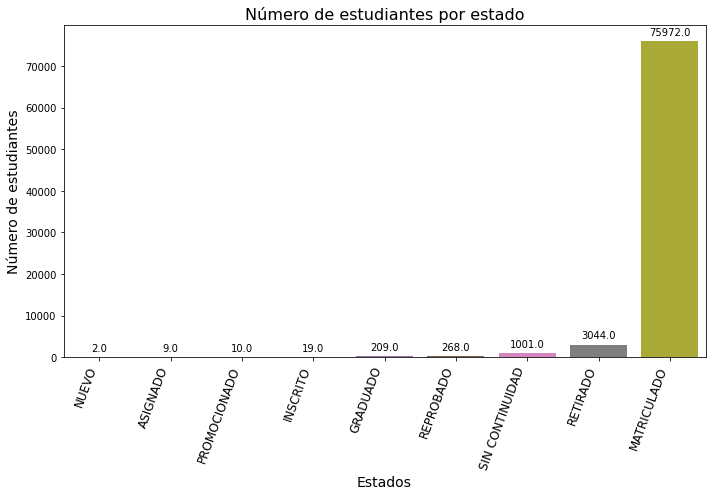

In [36]:
fig, ax1 = plt.subplots(figsize=(10, 7))
plot = sns.barplot(x=df_students["ESTADO"].value_counts(ascending=True).index, 
                   y=df_students["ESTADO"].value_counts(ascending=True))
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".1f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plot.set_xticklabels(labels=df_students["ESTADO"].value_counts(ascending=True).index,
                     rotation=70, size=12, horizontalalignment="right")
plt.title("Número de estudiantes por estado", size=16)
plt.xlabel("Estados", size=14)
plt.ylabel("Número de estudiantes", size=14)
plt.tight_layout()
plt.show()

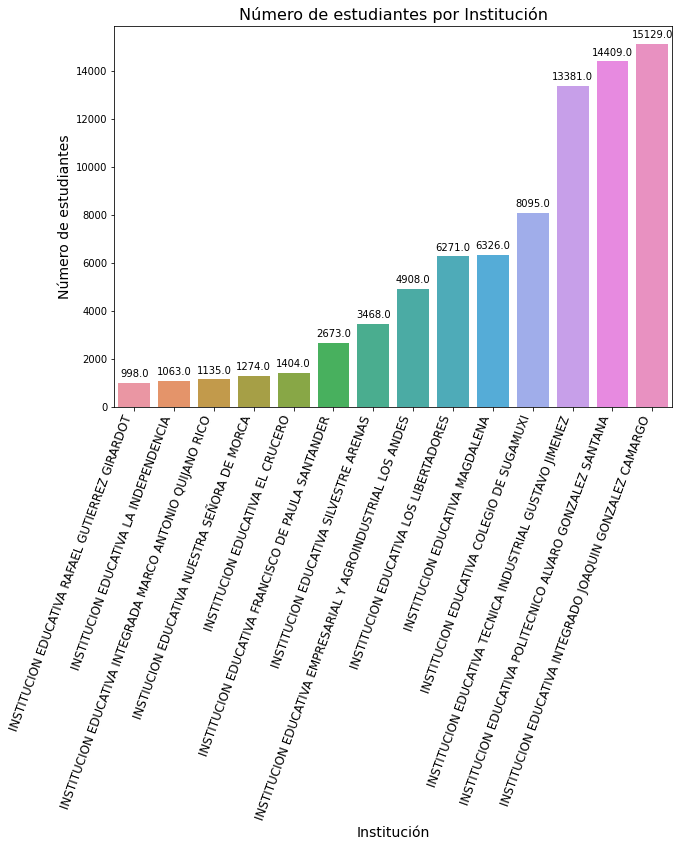

In [37]:
fig, ax1 = plt.subplots(figsize=(10, 7))
plot = sns.barplot(x=df_students["INSTITUCION"].value_counts(ascending=True).index, 
                   y=df_students["INSTITUCION"].value_counts(ascending=True))
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".1f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plot.set_xticklabels(labels=df_students["INSTITUCION"].value_counts(ascending=True).index,
                     rotation=70, size=12, horizontalalignment="right")
plt.title("Número de estudiantes por Institución", size=16)
plt.xlabel("Institución", size=14)
plt.ylabel("Número de estudiantes", size=14)
# plt.tight_layout()
plt.show()

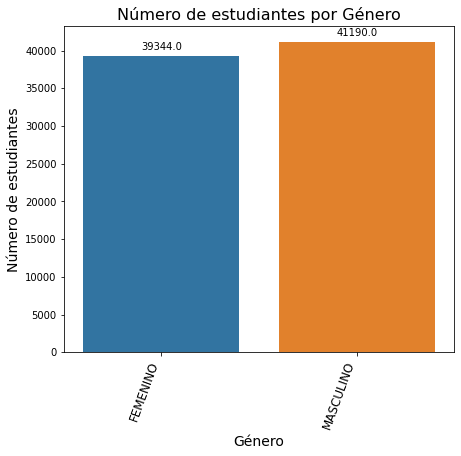

In [77]:
fig, ax1 = plt.subplots(figsize=(7, 6))
plot = sns.barplot(x=df_students["GENERO"].value_counts(ascending=True).index, 
                   y=df_students["GENERO"].value_counts(ascending=True))
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".1f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plot.set_xticklabels(labels=df_students["GENERO"].value_counts(ascending=True).index,
                     rotation=70, size=12, horizontalalignment="right")
plt.title("Número de estudiantes por Género", size=16)
plt.xlabel("Género", size=14)
plt.ylabel("Número de estudiantes", size=14)
# plt.tight_layout()
plt.show()

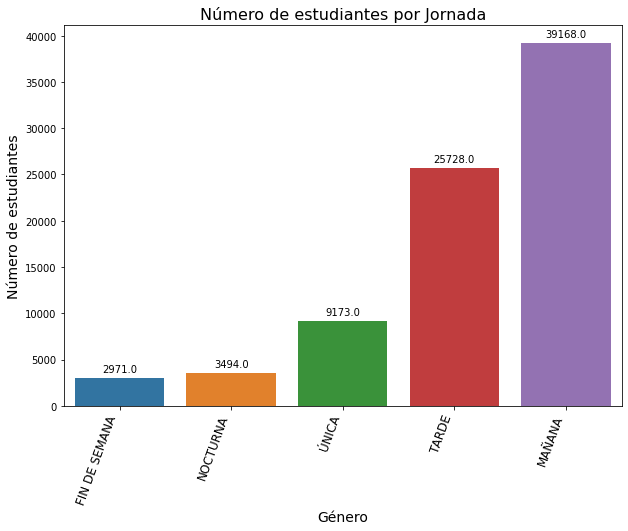

In [39]:
fig, ax1 = plt.subplots(figsize=(10, 7))
plot = sns.barplot(x=df_students["JORNADA"].value_counts(ascending=True).index, 
                   y=df_students["JORNADA"].value_counts(ascending=True))
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".1f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plot.set_xticklabels(labels=df_students["JORNADA"].value_counts(ascending=True).index,
                     rotation=70, size=12, horizontalalignment="right")
plt.title("Número de estudiantes por Jornada", size=16)
plt.xlabel("Género", size=14)
plt.ylabel("Número de estudiantes", size=14)
# plt.tight_layout()
plt.show()

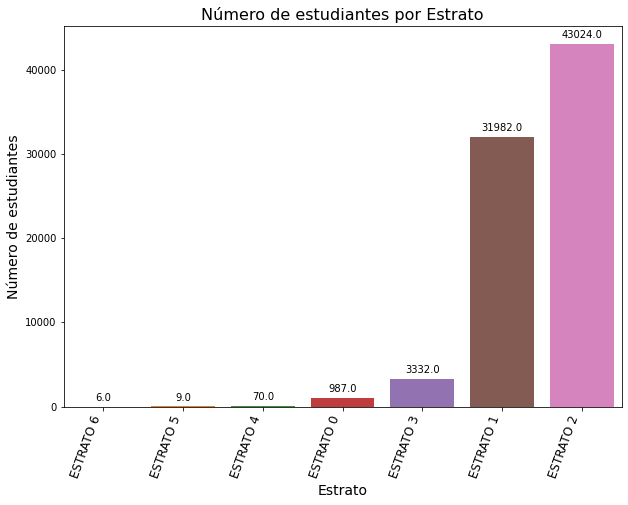

In [40]:
fig, ax1 = plt.subplots(figsize=(10, 7))
plot = sns.barplot(x=df_students["ESTRATO"].value_counts(ascending=True).index, 
                   y=df_students["ESTRATO"].value_counts(ascending=True))
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".1f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plot.set_xticklabels(labels=df_students["ESTRATO"].value_counts(ascending=True).index,
                     rotation=70, size=12, horizontalalignment="right")
plt.title("Número de estudiantes por Estrato", size=16)
plt.xlabel("Estrato", size=14)
plt.ylabel("Número de estudiantes", size=14)
# plt.tight_layout()
plt.show()

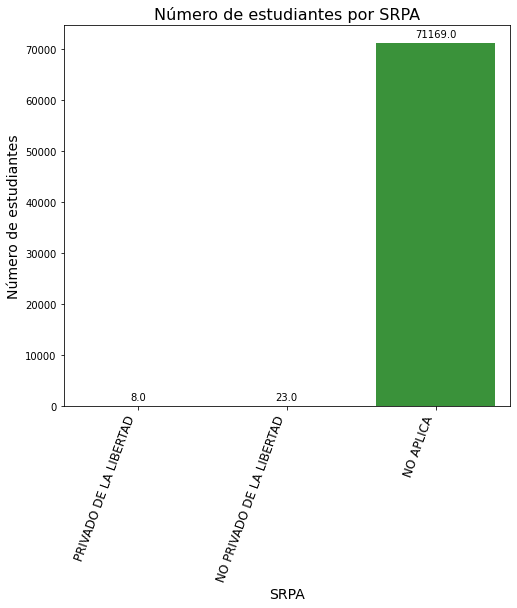

In [80]:
fig, ax1 = plt.subplots(figsize=(8, 7))
plot = sns.barplot(x=df_students["SRPA"].value_counts(ascending=True).index, 
                   y=df_students["SRPA"].value_counts(ascending=True))
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".1f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plot.set_xticklabels(labels=df_students["SRPA"].value_counts(ascending=True).index,
                     rotation=70, size=12, horizontalalignment="right")
plt.title("Número de estudiantes por SRPA", size=16)
plt.xlabel("SRPA", size=14)
plt.ylabel("Número de estudiantes", size=14)
# plt.tight_layout()
plt.show()

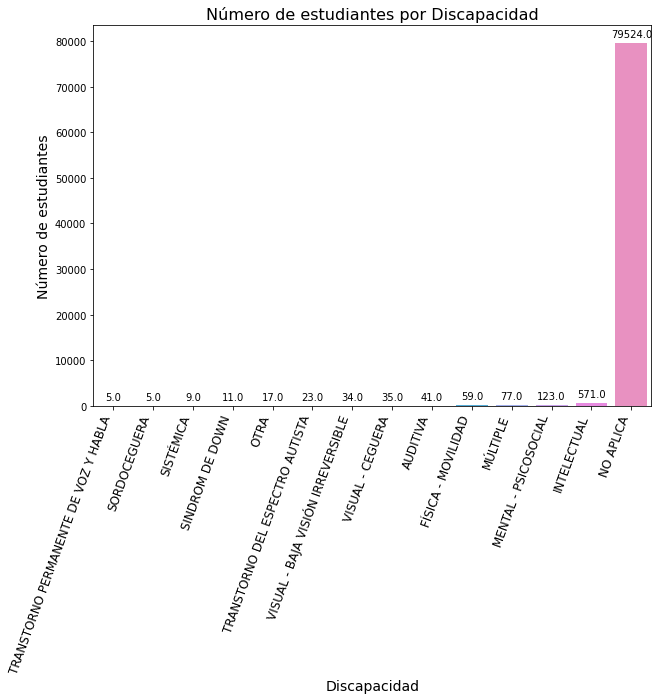

In [41]:
fig, ax1 = plt.subplots(figsize=(10, 7))
plot = sns.barplot(x=df_students["DISCAPACIDAD"].value_counts(ascending=True).index, 
                   y=df_students["DISCAPACIDAD"].value_counts(ascending=True))
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".1f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plot.set_xticklabels(labels=df_students["DISCAPACIDAD"].value_counts(ascending=True).index,
                     rotation=70, size=12, horizontalalignment="right")
plt.title("Número de estudiantes por Discapacidad", size=16)
plt.xlabel("Discapacidad", size=14)
plt.ylabel("Número de estudiantes", size=14)
# plt.tight_layout()
plt.show()

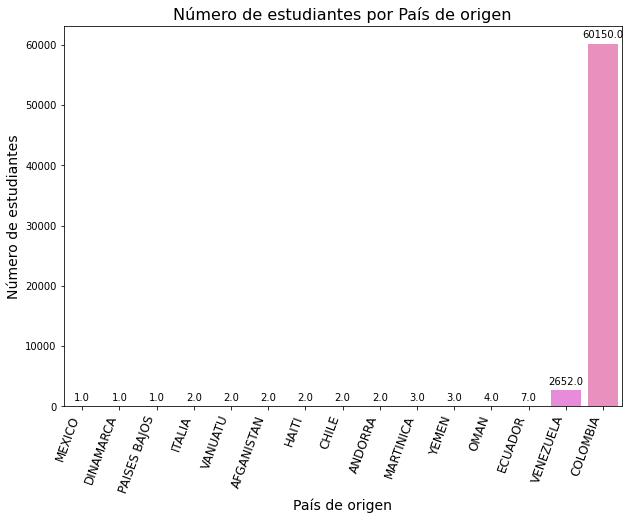

In [42]:
fig, ax1 = plt.subplots(figsize=(10, 7))
plot = sns.barplot(x=df_students["PAIS_ORIGEN"].value_counts(ascending=True).index, 
                   y=df_students["PAIS_ORIGEN"].value_counts(ascending=True))
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".1f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plot.set_xticklabels(labels=df_students["PAIS_ORIGEN"].value_counts(ascending=True).index,
                     rotation=70, size=12, horizontalalignment="right")
plt.title("Número de estudiantes por País de origen", size=16)
plt.xlabel("País de origen", size=14)
plt.ylabel("Número de estudiantes", size=14)
# plt.tight_layout()
plt.show()

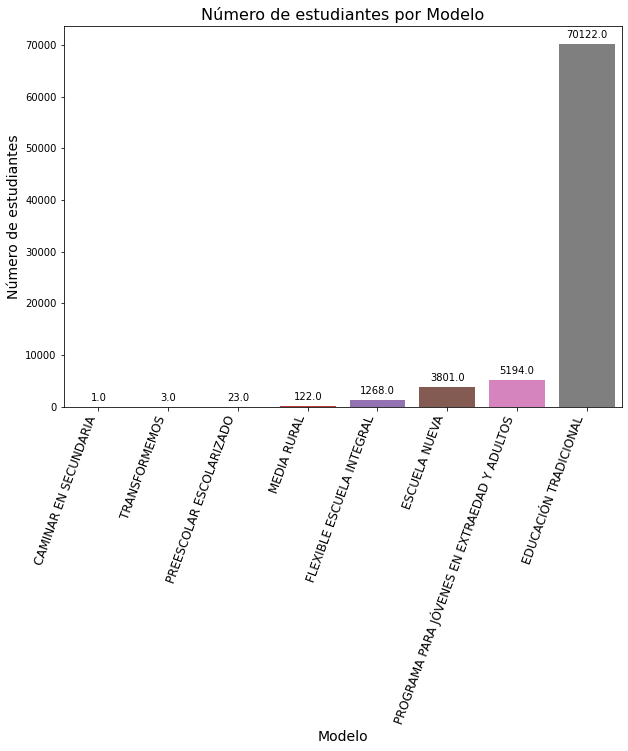

In [43]:
fig, ax1 = plt.subplots(figsize=(10, 7))
plot = sns.barplot(x=df_students["MODELO"].value_counts(ascending=True).index, 
                   y=df_students["MODELO"].value_counts(ascending=True))
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".1f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plot.set_xticklabels(labels=df_students["MODELO"].value_counts(ascending=True).index,
                     rotation=70, size=12, horizontalalignment="right")
plt.title("Número de estudiantes por Modelo", size=16)
plt.xlabel("Modelo", size=14)
plt.ylabel("Número de estudiantes", size=14)
# plt.tight_layout()
plt.show()

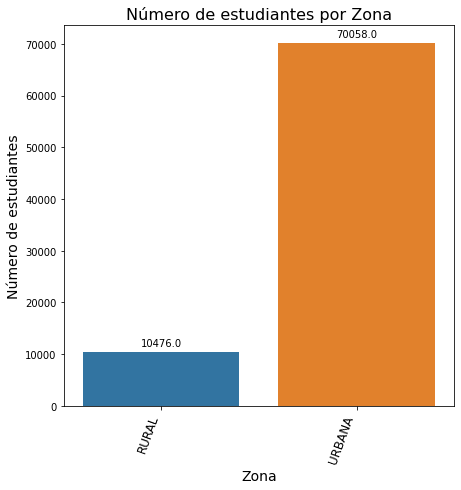

In [82]:
fig, ax1 = plt.subplots(figsize=(7, 7))
plot = sns.barplot(x=df_students["ZONA_SEDE"].value_counts(ascending=True).index, 
                   y=df_students["ZONA_SEDE"].value_counts(ascending=True))
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".1f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plot.set_xticklabels(labels=df_students["ZONA_SEDE"].value_counts(ascending=True).index,
                     rotation=70, size=12, horizontalalignment="right")
plt.title("Número de estudiantes por Zona", size=16)
plt.xlabel("Zona", size=14)
plt.ylabel("Número de estudiantes", size=14)
# plt.tight_layout()
plt.show()

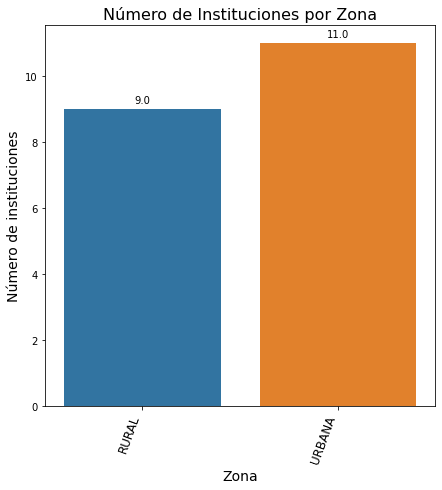

In [83]:
fig, ax1 = plt.subplots(figsize=(7, 7))
plot = sns.barplot(x=df_students.groupby("ZONA_SEDE")["INSTITUCION"].nunique().sort_values().index, 
                   y=df_students.groupby("ZONA_SEDE")["INSTITUCION"].nunique().sort_values())
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".1f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plot.set_xticklabels(labels=df_students["ZONA_SEDE"].value_counts(ascending=True).index,
                     rotation=70, size=12, horizontalalignment="right")
plt.title("Número de Instituciones por Zona", size=16)
plt.xlabel("Zona", size=14)
plt.ylabel("Número de instituciones", size=14)
plt.show()

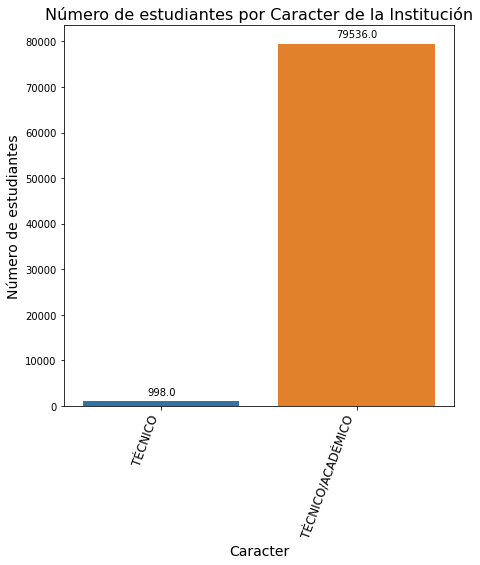

In [84]:
fig, ax1 = plt.subplots(figsize=(7, 7))
plot = sns.barplot(x=df_students["INSTITUCION_CARACTER"].value_counts(ascending=True).index, 
                   y=df_students["INSTITUCION_CARACTER"].value_counts(ascending=True))
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".1f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plot.set_xticklabels(labels=df_students["INSTITUCION_CARACTER"].value_counts(ascending=True).index,
                     rotation=70, size=12, horizontalalignment="right")
plt.title("Número de estudiantes por Caracter de la Institución", size=16)
plt.xlabel("Caracter", size=14)
plt.ylabel("Número de estudiantes", size=14)
# plt.tight_layout()
plt.show()

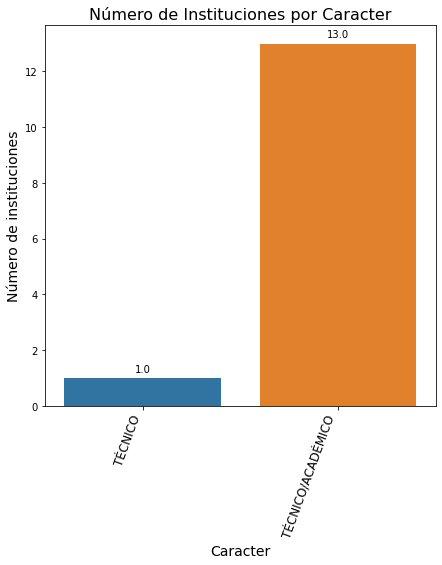

In [85]:
fig, ax1 = plt.subplots(figsize=(7, 7))
plot = sns.barplot(x=df_students.groupby("INSTITUCION_CARACTER")["INSTITUCION"].nunique().sort_values().index, 
                   y=df_students.groupby("INSTITUCION_CARACTER")["INSTITUCION"].nunique().sort_values())
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".1f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plot.set_xticklabels(labels=df_students["INSTITUCION_CARACTER"].value_counts(ascending=True).index,
                     rotation=70, size=12, horizontalalignment="right")
plt.title("Número de Instituciones por Caracter", size=16)
plt.xlabel("Caracter", size=14)
plt.ylabel("Número de instituciones", size=14)
plt.show()

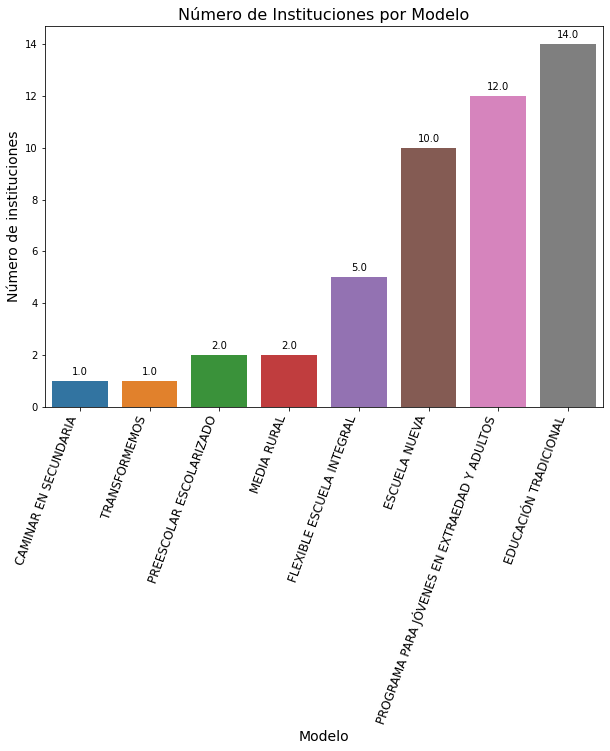

In [45]:
fig, ax1 = plt.subplots(figsize=(10, 7))
plot = sns.barplot(x=df_students.groupby("MODELO")["INSTITUCION"].nunique().sort_values().index, 
                   y=df_students.groupby("MODELO")["INSTITUCION"].nunique().sort_values())
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".1f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plot.set_xticklabels(labels=df_students["MODELO"].value_counts(ascending=True).index,
                     rotation=70, size=12, horizontalalignment="right")
plt.title("Número de Instituciones por Modelo", size=16)
plt.xlabel("Modelo", size=14)
plt.ylabel("Número de instituciones", size=14)
plt.show()

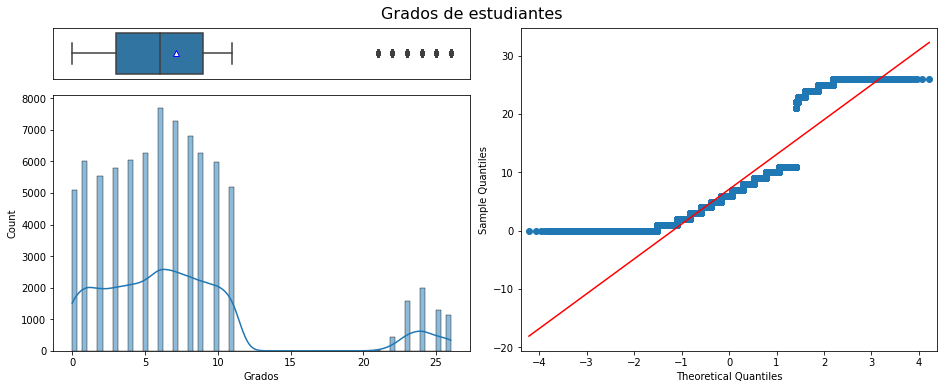

In [59]:
fig = plt.figure(constrained_layout=True, figsize=[13,5])
fig.suptitle("Grados de estudiantes", size=16, y=1.05)
spec = fig.add_gridspec(nrows=2, ncols=2, width_ratios=[1, 1], height_ratios=[1, 5])

ax_box = fig.add_subplot(spec[0, 0])
ax_hist = fig.add_subplot(spec[1, 0])
ax_qqplot = fig.add_subplot(spec[:, 1])

# Boxplot
boxplot = sns.boxplot(data=df_students, x=df_students["GRADO_COD"], showmeans=True, ax=ax_box,
                      meanprops={"markerfacecolor":"white", "markeredgecolor":"blue"})
ax_box.set(xlabel="", xticks=[])
ax_box.set(yticks=[])
boxplot.set_title("")

# Histplot
sns.histplot(data=df_students, x=df_students["GRADO_COD"], bins=75,  kde=True,  ax=ax_hist)
ax_hist.set(xlabel="Grados")

# QQplot
qqplot(df_students["GRADO_COD"], line='s', ax=ax_qqplot)

plt.show()

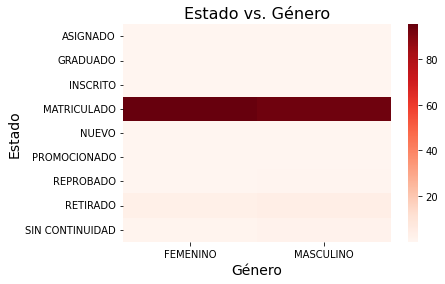

In [46]:
sns.heatmap(pd.crosstab(index=df_students["ESTADO"],
                        columns=df_students["GENERO"],
                        normalize="columns")*100,
            cmap="Reds")
plt.title("Estado vs. Género", size=16)
plt.xlabel("Género", size=14)
plt.ylabel("Estado", size=14)
plt.show()

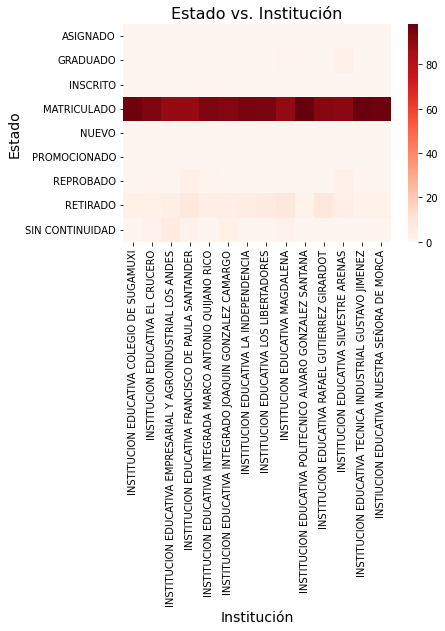

In [47]:
sns.heatmap(pd.crosstab(index=df_students["ESTADO"],
                        columns=df_students["INSTITUCION"],
                        normalize="columns")*100,
            cmap="Reds")
plt.title("Estado vs. Institución", size=16)
plt.xlabel("Institución", size=14)
plt.ylabel("Estado", size=14)
plt.show()

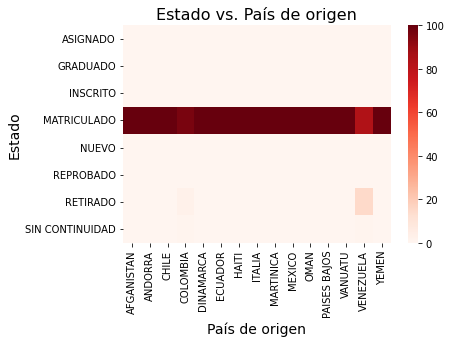

In [48]:
sns.heatmap(pd.crosstab(index=df_students["ESTADO"],
                        columns=df_students["PAIS_ORIGEN"],
                        normalize="columns")*100,
            cmap="Reds")
plt.title("Estado vs. País de origen", size=16)
plt.xlabel("País de origen", size=14)
plt.ylabel("Estado", size=14)
plt.show()